In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()
os.chdir( "C:/Users/Miray/Desktop")
os.getcwd()


'C:\\Users\\Miray\\Desktop'

In [ ]:
# Bad:1= Temmerüde düşme(kötü müşteri zamanında ödeyememiş), 0= Temmerüde düşmeme (iyi müşteri zamanında ödemiş)
# Loan= Kredi talep tutarı
# Mortdue= Mevcut ipoteğe ödenecek tutar
# Value= Mevcut müşkün değeri
# Reason= debt/homelmp
# Job= Müşteri meslek tipi
# Yoj= years at the present job
# Derog=Kötü raporlama sayısı
# Delinq= Ödenmemiş kredi limiti sayısı
# Clage= Onaylanan en eski kredi yaşı
# Ninq= Son kredi limiti sayısı
# Clno: Kredi Limiti Sayısı
# Debtinc=Borç/Gelir

In [19]:
finans=pd.read_csv("finans.csv")

In [20]:
finans.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [21]:
finans.shape

(3576, 13)

In [22]:
finans.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
bad,3576,NaN,NaN,NaN,0.199385,0.399594,0,0,0,0,1
loan,3576,NaN,NaN,NaN,18529.7,11262.8,1100,11000,16200,23100,89900
mortdue,3262,NaN,NaN,NaN,74013.9,44016.8,2619,46700.2,65858,91717,399550
value,3512,NaN,NaN,NaN,101077,54865.3,8800,65753,89183,118928,850000
reason,3429,2,DebtCon,2371,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job,3409,6,Other,1431,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yoj,3264,NaN,NaN,NaN,8.83264,7.56805,0,3,7,13,41
derog,3149,NaN,NaN,NaN,0.26167,0.865178,0,0,0,0,10
delinq,3225,NaN,NaN,NaN,0.432558,1.09923,0,0,0,0,15
clage,3397,NaN,NaN,NaN,179.833,87.0662,0.49,115.6,173.64,230.71,1168.23


In [23]:
finans.dtypes

bad          int64
loan         int64
mortdue    float64
value      float64
reason      object
job         object
yoj        float64
derog      float64
delinq     float64
clage      float64
ninq       float64
clno       float64
debtinc    float64
dtype: object

In [24]:
pd.crosstab(index=finans["bad"],columns="count")

col_0,count
bad,
0,2863
1,713


In [25]:
finans.isnull().sum().rename_axis('Değişkenler').reset_index(name='Kayıp Veriler')

,Değişkenler,Kayıp Veriler
0,bad,0
1,loan,0
2,mortdue,314
3,value,64
4,reason,147
5,job,167
6,yoj,312
7,derog,427
8,delinq,351
9,clage,179


In [26]:
finans.dropna(axis=0, how='any', inplace=True)

In [27]:
finans.isnull().values.any()

False

In [28]:
pd.crosstab(index=finans["bad"],columns="count")

col_0,count
bad,
0,1840
1,178


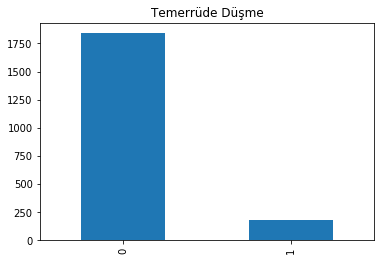

In [29]:
finans["bad"].value_counts().plot.bar(title='Temerrüde Düşme')

In [31]:
kat_finans=finans.select_dtypes(include=["object"])
kat_finans.head()

,reason,job
153,DebtCon,Mgr
154,DebtCon,Mgr
155,DebtCon,Mgr
156,HomeImp,Mgr
157,DebtCon,Mgr


In [34]:
kat_finans.reason.unique()

array(['DebtCon', 'HomeImp'], dtype=object)

In [35]:
kat_finans.job.unique()

array(['Mgr', 'Office', 'Other', 'ProfEx', 'Sales', 'Self'], dtype=object)

Text(0.5, 1.0, 'Krediyi Kullanma Nedeni')

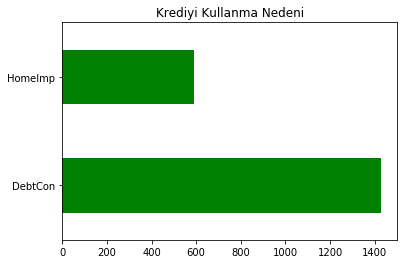

In [36]:
finans["reason"].value_counts().plot.barh(color = "green").set_title("Krediyi Kullanma Nedeni")

Text(0.5, 1.0, 'Meslek')

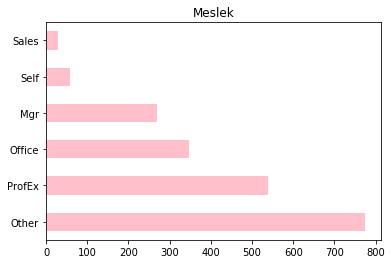

In [37]:
finans["job"].value_counts().plot.barh(color = "pink").set_title("Meslek")


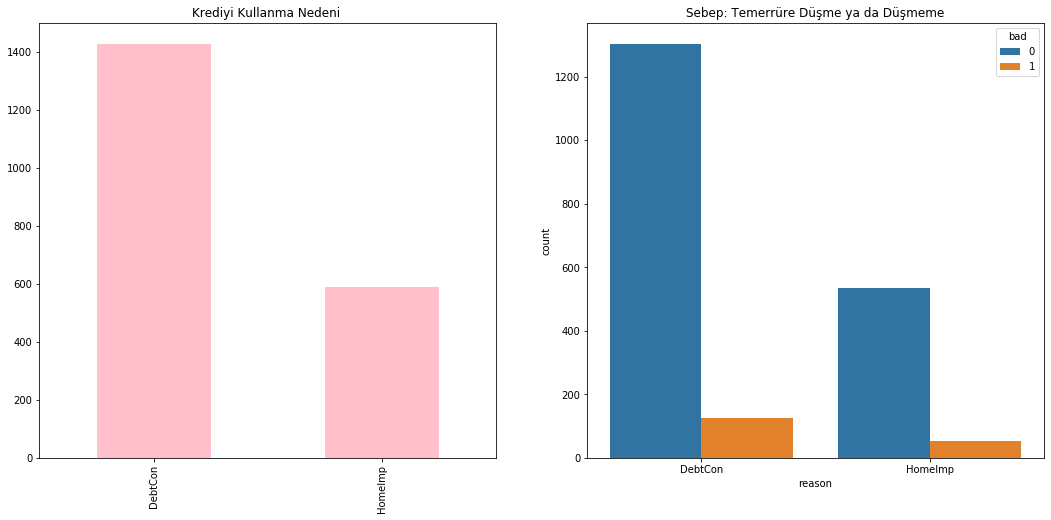

In [64]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.countplot("reason", hue = "bad", data = finans, ax = ax[1])
finans["reason"].value_counts().plot.bar(color = "pink", ax = ax[0])
ax[0].set_title("Krediyi Kullanma Nedeni ")
ax[1].set_title("Sebep: Temerrüre Düşme ya da Düşmeme")
plt.show()

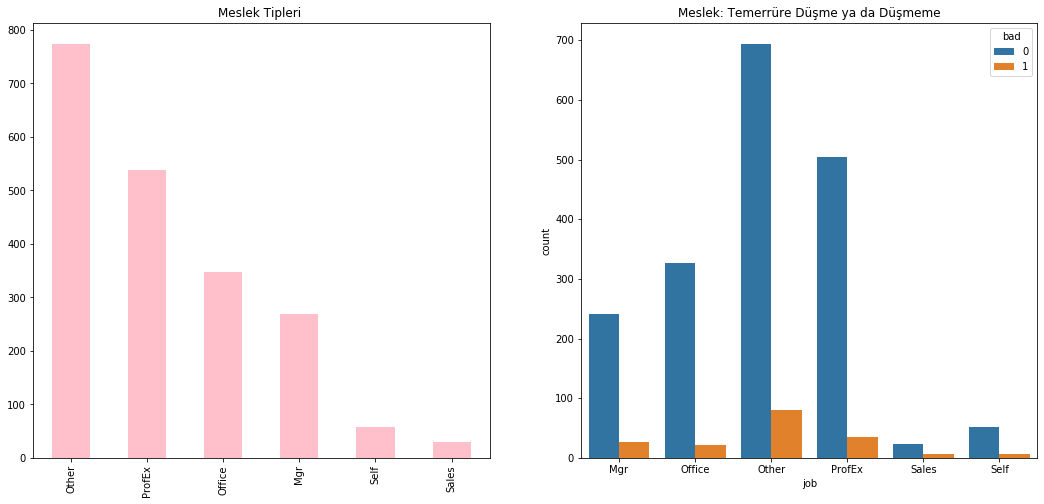

In [65]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.countplot("job", hue = "bad",data = finans, ax = ax[1])
finans["job"].value_counts().plot.bar(color = "pink", ax = ax[0])
ax[0].set_title("Meslek Tipleri ")
ax[1].set_title("Meslek: Temerrüre Düşme ya da Düşmeme")
plt.show()

In [157]:
pd.crosstab([finans["reason"], finans["bad"]],finans["job"],margins = True).style.background_gradient(cmap ="summer_r")


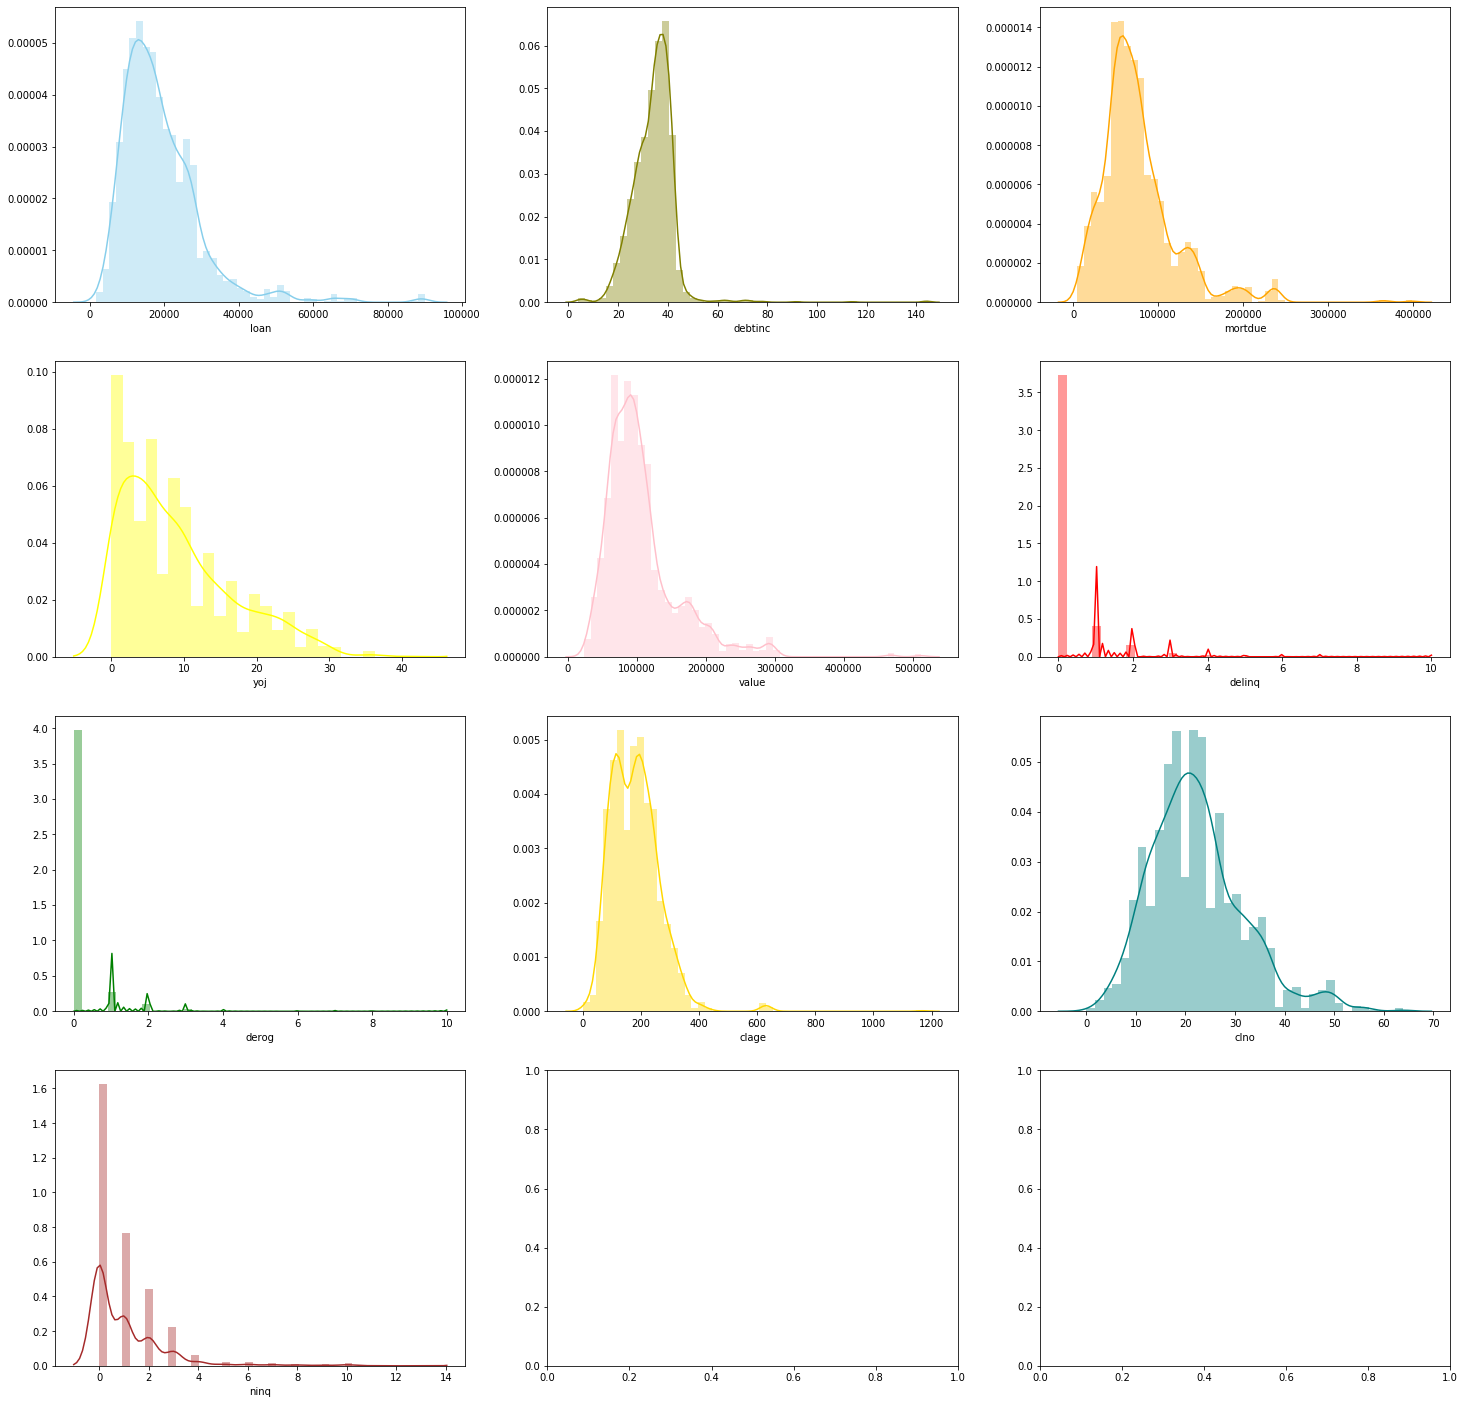

In [42]:
f, axes = plt.subplots(4, 3, figsize=(25,25))
sns.distplot( finans["loan"] , color="skyblue", ax=axes[0, 0])
sns.distplot( finans["debtinc"] , color="olive", ax=axes[0, 1])
sns.distplot( finans["mortdue"] , color="orange", ax=axes[0, 2])
sns.distplot( finans["yoj"] , color="yellow", ax=axes[1, 0])
sns.distplot( finans["value"] , color="pink", ax=axes[1, 1])
sns.distplot( finans["delinq"] , color="red", ax=axes[1, 2])
sns.distplot( finans["derog"] , color="green", ax=axes[2, 0])
sns.distplot( finans["clage"] , color="gold", ax=axes[2, 1])
sns.distplot( finans["clno"] , color="teal", ax=axes[2, 2])
sns.distplot( finans["ninq"], color="brown", ax=axes[3, 0])


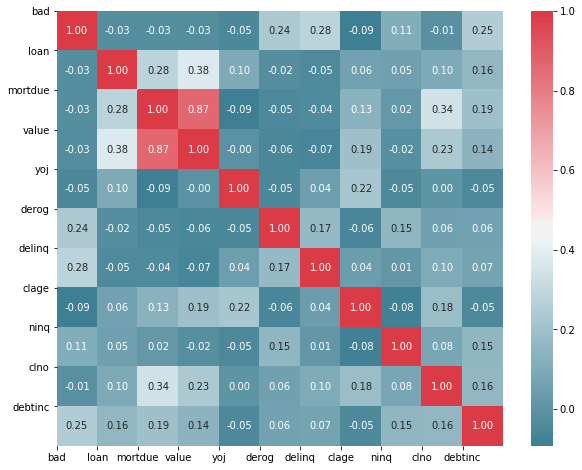

In [43]:
#Create Correlation matrix
corr = finans.corr()
fig, ax = plt.subplots(figsize=(10,8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show() 
#Delinq, Derog and Debtinc ile pozitif yönlü bir ilişki vardır.

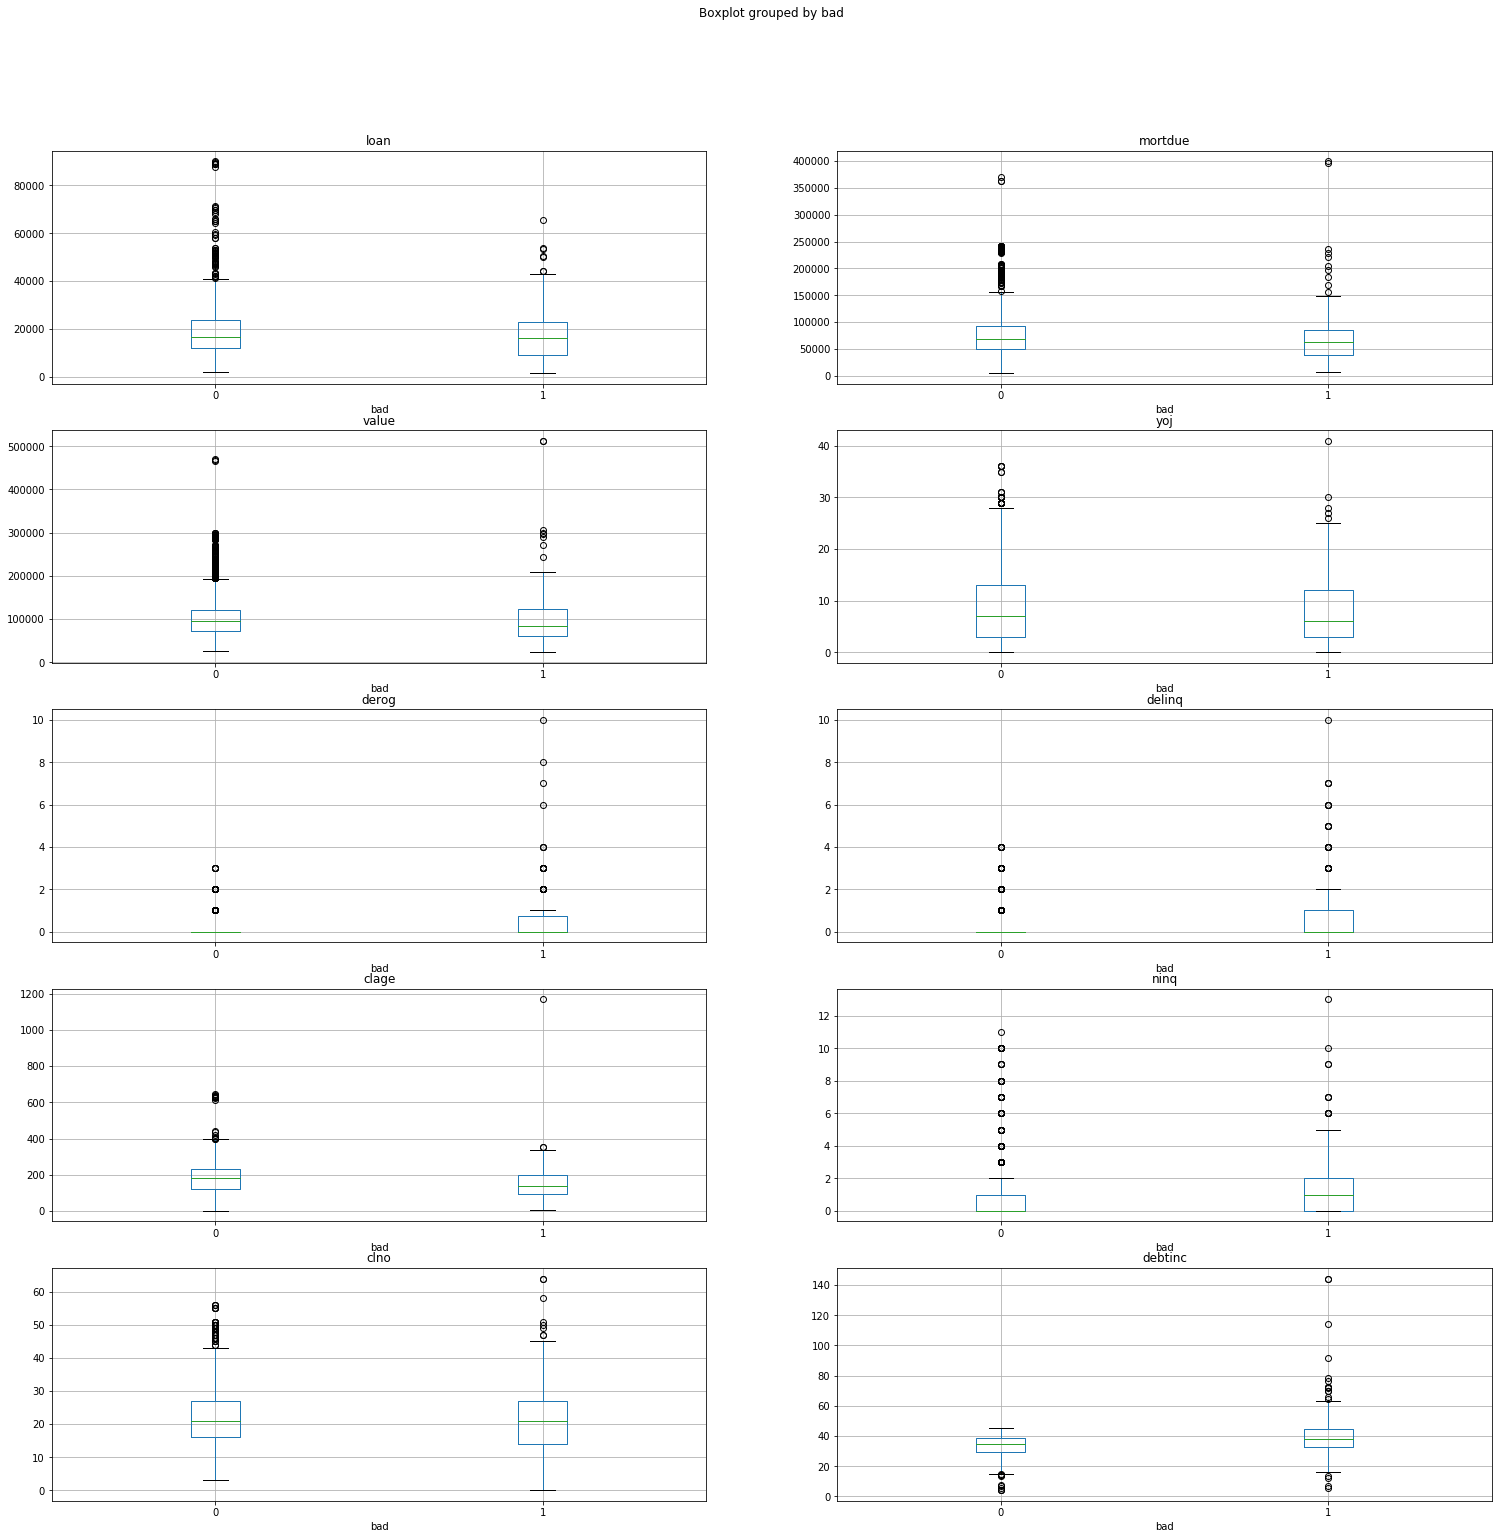

In [150]:
# boxplot, quartile'ler aracılığıyla bize bilgi sunar. [min-0.25-0.50(median)-0.75-max] ve aykırı gözlemler.. Aykırı gözlemler soldaysa sola çarpık, sağdaysa sağa çarpık..
f, axes = plt.subplots(5, 2, figsize=(25,25))
finans.boxplot(column="loan", by='bad', ax=axes[0, 0] )
finans.boxplot(column="mortdue", by='bad',ax=axes[0, 1])
finans.boxplot(column="value", by='bad', ax=axes[1, 0])
finans.boxplot(column="yoj", by='bad', ax=axes[1, 1])
finans.boxplot(column="derog", by='bad',ax=axes [2, 0])
finans.boxplot(column="delinq", by='bad', ax=axes[2, 1])
finans.boxplot(column="clage", by='bad',ax=axes[3, 0] )
finans.boxplot(column="ninq", by='bad',ax=axes[3, 1])
finans.boxplot(column="clno", by='bad',ax=axes[4, 0])
finans.boxplot(column="debtinc", by='bad',ax=axes[4, 1])

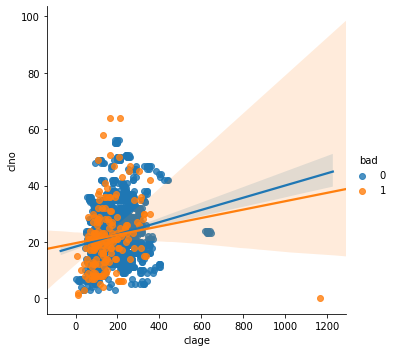

In [82]:
sns.lmplot(x="clage", y="clno", hue="bad", data=finans) # clage ve clno arasındaki ilişkinin şiddeti bad=0'da daha güçlü. bad=1'de çok sapma var

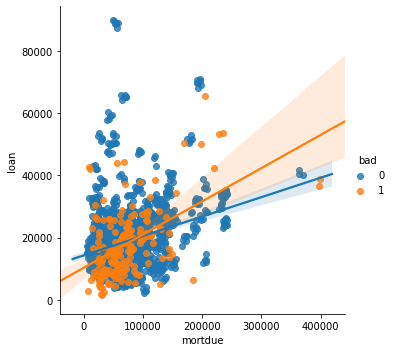

In [78]:
sns.lmplot(x="mortdue", y="loan", hue="bad", data=finans) #doğrusal ilişkinin gösterilmesi mortdue ve loan arasındaki ilişkinin şiddeti, bad=1 kötü müşteride daha güçlü ve çok sapma var.

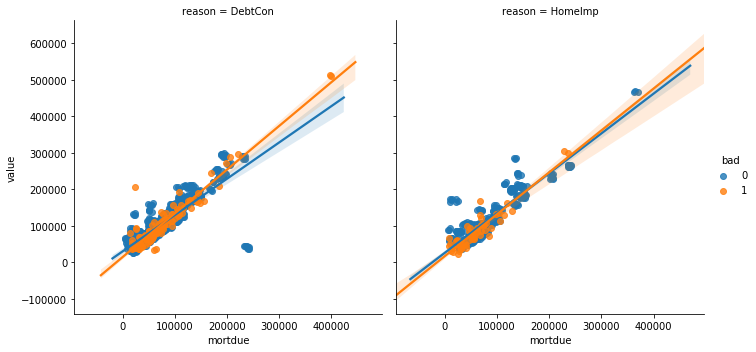

In [95]:
sns.lmplot(x="mortdue", y="value", hue="bad",col= "reason", data=finans) #mevcut ipoteğe ödenecek tutar ile, mevcut mülkün değeri bad=0-1'de ve reason=Homelmp'de şiddetli bir ilişkide,0-1 arasında anlamlı bir fark gözlemlenememiş gibi. 

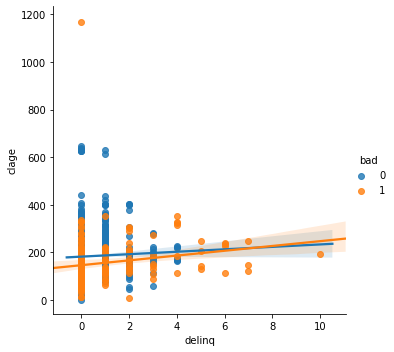

In [85]:
sns.lmplot(x="delinq", y="clage", hue="bad", data=finans)

In [ ]:
# eğim çok düşük ve çok fazla sapma var. Beklenen bir durum, delinq ve clage arasında şiddetli bir ilişki gözlenemezdi

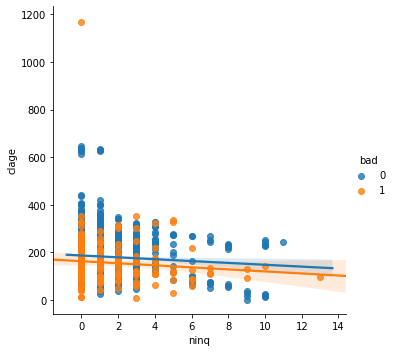

In [86]:
sns.lmplot(x="ninq", y="clage", hue="bad", data=finans)# ters yönde, ninq artııkça clage azalmış

In [56]:
grps=pd.unique(finans.bad.values)
dict={
                'loan':'loan',
                'mortdue':'mortdue',
                'value':'value',
                'yoj':'yoj',
                'derog':'derog',
                'delinq':'delinq',
                'clage':'clage',
                'ninq':'ninq',
                'clno':'clno',
                'debtinc':'debtinc'
                
         }

In [57]:
from scipy import stats
import scipy.stats as st
from scipy.stats import shapiro
from scipy.stats import levene 

In [59]:
#Shapiro-Wilks Test#
#h0: Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)
#h1: Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)
#her parametrenin bad column 0-1 degeri icin normal dağılımına bakıyoruz. 
for key in dict:
    for i in grps:
            stat,p=shapiro(finans[dict[key]][finans['bad']==i])
            alpha=0.05 #kabul edilebilir hata miktarıdır.
            if(p>alpha):
                print(dict[key],i,"-->Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0) ")
            else:
                 print(dict[key],i,"-->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0) " ) 

loan 0 -->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0) 
loan 1 -->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0) 
mortdue 0 -->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0) 
mortdue 1 -->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0) 
value 0 -->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0) 
value 1 -->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0) 
yoj 0 -->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0) 
yoj 1 -->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0) 
derog 0 -->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0) 
derog 1 -->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0) 
delinq 0 -->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0) 
delinq 1 -->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0) 
clage 0 -->Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0) 
clage 1 -->Ö

In [ ]:
# Örneklem normal dağılımdan gelmiyor. Nonparametrik..

In [97]:
import statsmodels.formula.api as smf 

In [126]:
# Levene: Varyanslar homojen mi ?
# H0: Varyanslar homojendir. (All of the k sample populations have equal variances)
# H1: Varyanslar homojen değildir.( At least one of the k sample population variances are not equal.)
for key in dict: 
    for i in grps:
            stat,p=levene(finans[dict[key]][finans['bad'] == 0], finans[dict[key]][finans['bad'] == 1])
            alpha=0.05
            if(p>alpha):
                print(dict[key],i,"--> varyans homojendir. Fail to Reject H0", "Statistics=%.3f, p=%.3f" % (stat,p))
            else:
                print(dict[key],i," --> varyans homojen degildir. Reject H0", "Statistics=%.3f, p=%.3f" % (stat,p))
                

loan 0 --> varyans homojendir. Fail to Reject H0 Statistics=2.395, p=0.122
loan 1 --> varyans homojendir. Fail to Reject H0 Statistics=2.395, p=0.122
mortdue 0 --> varyans homojendir. Fail to Reject H0 Statistics=2.307, p=0.129
mortdue 1 --> varyans homojendir. Fail to Reject H0 Statistics=2.307, p=0.129
value 0  --> varyans homojen degildir. Reject H0 Statistics=3.991, p=0.046
value 1  --> varyans homojen degildir. Reject H0 Statistics=3.991, p=0.046
yoj 0  --> varyans homojen degildir. Reject H0 Statistics=4.210, p=0.040
yoj 1  --> varyans homojen degildir. Reject H0 Statistics=4.210, p=0.040
derog 0  --> varyans homojen degildir. Reject H0 Statistics=118.586, p=0.000
derog 1  --> varyans homojen degildir. Reject H0 Statistics=118.586, p=0.000
delinq 0  --> varyans homojen degildir. Reject H0 Statistics=172.844, p=0.000
delinq 1  --> varyans homojen degildir. Reject H0 Statistics=172.844, p=0.000
clage 0 --> varyans homojendir. Fail to Reject H0 Statistics=0.008, p=0.927
clage 1 --> 

In [ ]:
#loan-mortdue ve clage varyansları homojendir. 
#value-yoj-derog-delinq-ninq-clno-debtinc varyansları homojen değildir.

In [140]:
from scipy.stats import f_oneway 

In [ ]:
## https://www.datarobot.com/blog/ordinary-least-squares-in-python/
## formula: response ~ predictors est = smf.ols(formula='Employed ~ GNP', data=df).fit() est.summary()

In [98]:
#Amaç değişkenine etkileri..
results=smf.ols('bad ~ (loan)',finans).fit() 
print(results.summary()) # bad ve loan arasında anlamlı bir farklılık yoktur.

                            OLS Regression Results                            
Dep. Variable:                    bad   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.383
Date:                Thu, 16 Jul 2020   Prob (F-statistic):              0.240
Time:                        13:39:43   Log-Likelihood:                -319.62
No. Observations:                2018   AIC:                             643.2
Df Residuals:                    2016   BIC:                             654.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1013      0.013      7.908      0.0

In [99]:
results=smf.ols('bad ~ mortdue',finans).fit()      
print(results.summary()) #bad ve mortdue arasında anlamlı bir farklılık yoktur.

                            OLS Regression Results                            
Dep. Variable:                    bad   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.271
Date:                Thu, 16 Jul 2020   Prob (F-statistic):              0.260
Time:                        13:39:45   Log-Likelihood:                -319.68
No. Observations:                2018   AIC:                             643.4
Df Residuals:                    2016   BIC:                             654.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1004      0.013      8.005      0.0

In [103]:
results=smf.ols('bad ~ clage',finans).fit()      
print(results.summary()) # bad ve clage değişkenleri arasında anlamlı bir fark gözlemlenmektedir.

                            OLS Regression Results                            
Dep. Variable:                    bad   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     16.77
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           4.38e-05
Time:                        13:44:41   Log-Likelihood:                -311.96
No. Observations:                2018   AIC:                             627.9
Df Residuals:                    2016   BIC:                             639.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1433      0.015      9.646      0.0

In [156]:
results=smf.ols('bad ~ value',finans).fit()    
print(results.summary())
results=smf.ols('bad ~ yoj',finans).fit()      
print(results.summary()) 
results=smf.ols('bad ~ derog',finans).fit()      
print(results.summary()) 
results=smf.ols('bad ~ delinq',finans).fit()       
print(results.summary()) 
results=smf.ols('bad ~ ninq',finans).fit()       
print(results.summary())  
results=smf.ols('bad ~ clno',finans).fit()        
print(results.summary())  
results=smf.ols('bad ~ debtinc',finans).fit() 
print(results.summary())   

                            OLS Regression Results                            
Dep. Variable:                    bad   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.979
Date:                Thu, 16 Jul 2020   Prob (F-statistic):              0.160
Time:                        17:18:51   Log-Likelihood:                -319.32
No. Observations:                2018   AIC:                             642.6
Df Residuals:                    2016   BIC:                             653.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1058      0.014      7.557      0.0

In [ ]:
#yoj, derog, delinq, clage, ninq and deptinc ayrıştırıcıdır. Modele katılır.

In [125]:
results=smf.ols('value ~ (loan)',finans).fit() 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     338.2
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           5.97e-70
Time:                        14:57:19   Log-Likelihood:                -24697.
No. Observations:                2018   AIC:                         4.940e+04
Df Residuals:                    2016   BIC:                         4.941e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.075e+04   2259.019     31.319      0.0

In [151]:
results=smf.ols('mortdue ~ (loan)',finans).fit() 
print(results.summary()) #anlamlı ilişki mevcuttur.

                            OLS Regression Results                            
Dep. Variable:                mortdue   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     175.0
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           2.22e-38
Time:                        17:09:26   Log-Likelihood:                -24377.
No. Observations:                2018   AIC:                         4.876e+04
Df Residuals:                    2016   BIC:                         4.877e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.414e+04   1927.692     28.088      0.0